# CD7: clustering

In this notebook, we perform a clustering analysis of the CD7 data on features extracted from SCIP.

In [8]:
import pyarrow.parquet as pq
from ehv.correlation import Correlation
import seaborn
from sklearn.feature_selection import VarianceThreshold

In [2]:
import os
os.environ["VSC_DATA_VO_USER"]

'/data/gent/vo/000/gvo00070/vsc42015'

In [3]:
df = pq.read_table("/data/gent/vo/000/gvo00070/vsc42015/datasets/CD7/results/scip/202112151458/features.parquet").to_pandas()

In [4]:
df.shape

(136951, 1290)

## Reduce input dimensionality

The original dataframe has 1290 features. This is too high for a clustering analysis. I will reduce the input dimensionality with a correlation analysis and a dimensionality reduction.

In [47]:
var = VarianceThreshold(threshold=0.001).fit(df.filter(regex="feat"))
cols = df.filter(regex="feat").columns[var.get_support()]

In [19]:
corr = df[cols].sample(n=10000).corr()

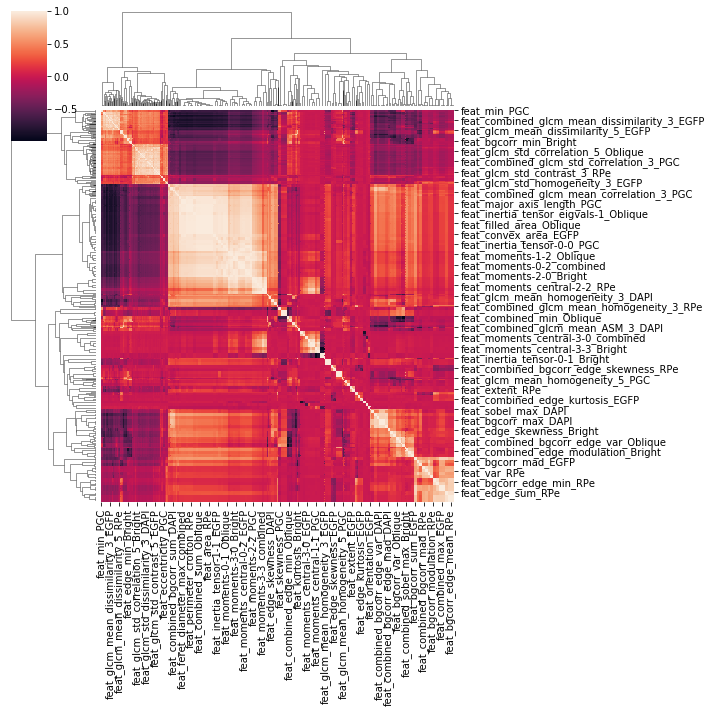

In [20]:
seaborn.clustermap(corr)

In [33]:
corr = Correlation(0.9)
corr.fit(df[cols].sample(n=10000))

In [34]:
cols = cols.drop(corr.correlated)

In [35]:
corr = df[cols].corr()

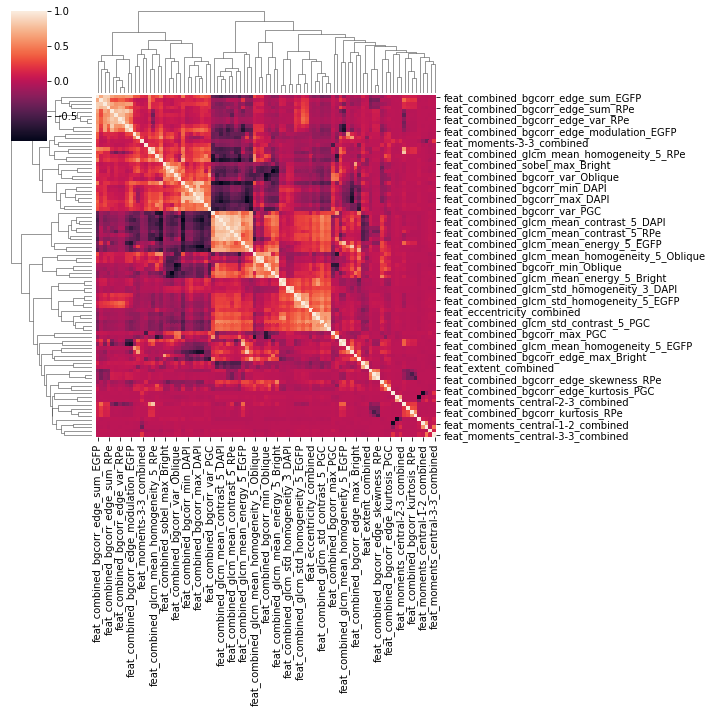

In [36]:
seaborn.clustermap(corr)

In [52]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, normalize

In [58]:
pca = PCA(n_components=2).fit_transform(scale(normalize(df[cols])))

In [45]:
pca.shape

(136951, 2)

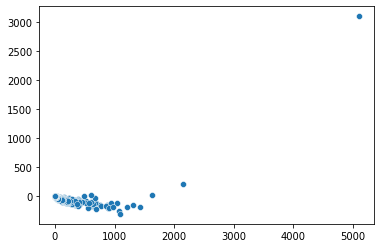

In [59]:
seaborn.scatterplot(x=pca[:, 0], y=pca[:, 1])